In [95]:
from netCDF4 import Dataset
import numpy as np
#import cbsyst as cb

#import matplotlib
import matplotlib.pyplot as plt
#import cmocean.cm as cmo

import csv

# Load data and list variables

In [96]:
# load his file
hisfile = 'roms_his.nc'
ds = Dataset(hisfile)

# print variable names
print(ds.variables.keys())

dict_keys(['ntimes', 'ndtfast', 'dt', 'dtfast', 'dstart', 'nHIS', 'ndefHIS', 'nRST', 'ntsAVG', 'nAVG', 'ndefAVG', 'Falpha', 'Fbeta', 'Fgamma', 'Akt_bak', 'Akv_bak', 'rdrg', 'rdrg2', 'Zob', 'Zos', 'Znudg', 'M2nudg', 'M3nudg', 'Tnudg', 'rho0', 'gamma2', 'LuvSrc', 'LwSrc', 'LtracerSrc', 'LsshCLM', 'Lm2CLM', 'Lm3CLM', 'LtracerCLM', 'LnudgeM2CLM', 'LnudgeM3CLM', 'LnudgeTCLM', 'BioIter', 'K_ext', 'K_NO3', 'K_Phy', 'Vm_NO3', 'PhyMR', 'ZooGR', 'ZooMR', 'ZooMD', 'ZooGA', 'ZooEC', 'DetRR', 'wDet', 'spherical', 'xl', 'el', 'Vtransform', 'Vstretching', 'theta_s', 'theta_b', 'Tcline', 'hc', 'grid', 's_rho', 's_w', 'Cs_r', 'Cs_w', 'h', 'f', 'pm', 'pn', 'lon_rho', 'lat_rho', 'lon_u', 'lat_u', 'lon_v', 'lat_v', 'lon_psi', 'lat_psi', 'ocean_time', 'zeta', 'ubar', 'vbar', 'u', 'v', 'w', 'omega', 'temp', 'salt', 'NO3', 'phytoplankton', 'zooplankton', 'detritus', 'rho', 'Hsbl', 'Hbbl', 'AKv', 'AKt', 'AKs', 'shflux', 'latent', 'sensible', 'lwrad', 'swrad'])


In [97]:
# print variable names and long names
kl = list(ds.variables.keys())

for i in range(58):
    print(kl[i], '    ', ds.variables[kl[i]].long_name)
    
# skip 59 because grid does not have a long name

for i in range(59, len(kl)):
    print(kl[i], '   ', ds.variables[kl[i]].long_name)

ntimes      number of long time-steps
ndtfast      number of short time-steps
dt      size of long time-steps
dtfast      size of short time-steps
dstart      time stamp assigned to model initilization
nHIS      number of time-steps between history records
ndefHIS      number of time-steps between the creation of history files
nRST      number of time-steps between restart records
ntsAVG      starting time-step for accumulation of time-averaged fields
nAVG      number of time-steps between time-averaged records
ndefAVG      number of time-steps between the creation of average files
Falpha      Power-law shape barotropic filter parameter
Fbeta      Power-law shape barotropic filter parameter
Fgamma      Power-law shape barotropic filter parameter
Akt_bak      background vertical mixing coefficient for tracers
Akv_bak      background vertical mixing coefficient for momentum
rdrg      linear drag coefficient
rdrg2      quadratic drag coefficient
Zob      bottom roughness
Zos      surface 

<ipython-input-97-62b7f59370b5>:5: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(kl[i], '    ', ds.variables[kl[i]].long_name)
<ipython-input-97-62b7f59370b5>:10: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(kl[i], '   ', ds.variables[kl[i]].long_name)


# Calculate depth 

### z = zeta + Cs * (h + zeta)
### for biotoy free-surface is zero and bathymetry is flat
### simplify to: z = Cs * h

In [98]:
# confirm free surface is zero 
zeta = ds.variables['zeta']
print(zeta[:])

[[[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 

<ipython-input-98-c3b12f1f12a3>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(zeta[:])


In [99]:
# confirm bathymetry is flat
h = ds.variables['h']
print(h[:])

[[210.5856863 210.5856863 210.5856863 210.5856863 210.5856863 210.5856863]
 [210.5856863 210.5856863 210.5856863 210.5856863 210.5856863 210.5856863]
 [210.5856863 210.5856863 210.5856863 210.5856863 210.5856863 210.5856863]
 [210.5856863 210.5856863 210.5856863 210.5856863 210.5856863 210.5856863]
 [210.5856863 210.5856863 210.5856863 210.5856863 210.5856863 210.5856863]
 [210.5856863 210.5856863 210.5856863 210.5856863 210.5856863 210.5856863]]


<ipython-input-99-0dfb72207e1a>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(h[:])


In [100]:
# calculate depth at rho-points
Cs = ds.variables['Cs_r']

z = Cs*h1
print(z)

[-200.3794141  -182.26733755 -166.79328963 -153.4989293  -141.97784351
 -131.86259291 -122.81363271 -114.51104522 -106.65090544  -98.94904064
  -91.15529537  -83.07990249  -74.62871058  -65.83587874  -56.87540392
  -48.03473502  -39.64992047  -32.02443677  -25.36478235  -19.75499654
  -15.1695757   -11.50807928   -8.63284433   -6.39848853   -4.67003944
   -3.33139803   -2.28737907   -1.46224715   -0.7967592    -0.24487615]


# Plot variable profiles over time

In [101]:
# function to plot a profile at multiple time steps
# inputs are variable name and time steps to plot
def plot_profiles(varname,t):
    tstr=[]

    plt.rcParams.update({'font.size':16})

    fig = plt.figure(figsize=[6,10])
    for i in t:
        varvals = ds.variables[varname]
        var1 = np.squeeze(varvals[i, :, 2, 2])
        
        plt.plot(var1, z)
        plt.ylabel('depth [m]')
        plt.xlabel(varname +' ['+ ds.variables[varname].units+']')
        tstr.append(str(i))
    
    plt.legend(tstr)
    plt.title(varname)
    
    plt.savefig('Figures/'+varname+'_profile.png')

<ipython-input-101-95aefa6cec37>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  var1 = np.squeeze(varvals[i, :, 2, 2])
<ipython-input-101-95aefa6cec37>:15: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  plt.xlabel(varname +' ['+ ds.variables[varname].units+']')
<ipython-input-101-95aefa6cec37>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-note

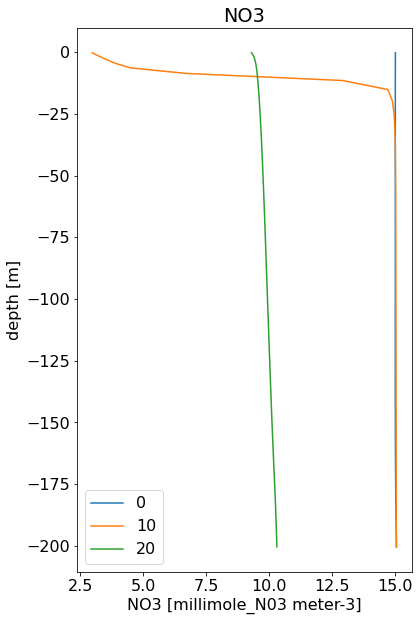

In [102]:
t=[0,10,20]
plot_profiles('NO3',t)

<ipython-input-101-95aefa6cec37>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  var1 = np.squeeze(varvals[i, :, 2, 2])
<ipython-input-101-95aefa6cec37>:15: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  plt.xlabel(varname +' ['+ ds.variables[varname].units+']')
<ipython-input-101-95aefa6cec37>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-note

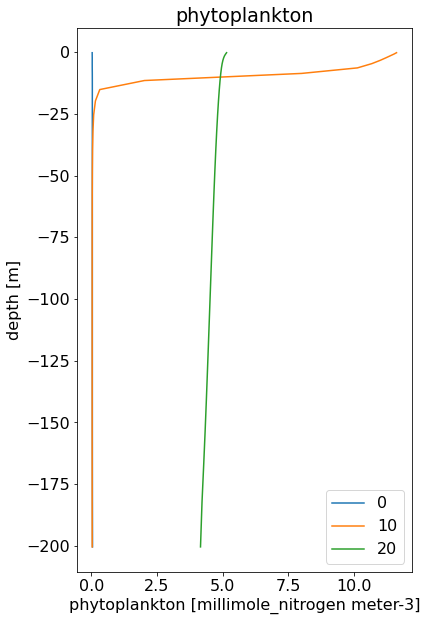

In [103]:
plot_profiles('phytoplankton',t)

<ipython-input-101-95aefa6cec37>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  var1 = np.squeeze(varvals[i, :, 2, 2])
<ipython-input-101-95aefa6cec37>:15: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  plt.xlabel(varname +' ['+ ds.variables[varname].units+']')
<ipython-input-101-95aefa6cec37>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-note

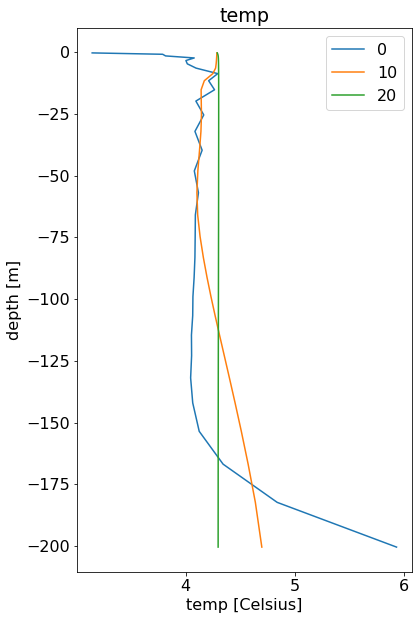

In [104]:
plot_profiles('temp',t)

# Calculate inventory

In [108]:
# calculate the depths top and bottom of cell

# initialize
cellbounds = np.zeros(31)

# calculate bottom of top cell
cellbounds[1] = -2*z[-1]

# top and bottom of each cell!
for i in range(29):
    cellbounds[i+2] = cellbounds[i+1]+2*(-z[-i-2]-cellbounds[i+1])
    
# height of each cell in meters
cellheight = np.zeros(30)

for j in range(30):
    cellheight[j]=cellbounds[j+1]-cellbounds[j]

In [113]:
# function to compute inventory
def compute_inventory(varname):
    varvals = ds.variables[varname]
    varprofs = np.squeeze(varvals[:,:,2,2])
    rho = ds.variables['rho'][:]+ds.variables['rho0'][:]
    rho_profs = np.squeeze(rho[:,:,2,2])
    
    var_inv_full=np.zeros(varvals.shape[0])
    for i in range(varvals.shape[0]):
        prof1 = varprofs[i,:]
        rho_prof1 = rho_profs[i,:]
        
        var_inv1 = prof1*rho_prof1*cellheight
        var_inv_full[i] = sum(var_inv1)
        
    return var_inv_full

In [117]:
NO3_inv = compute_inventory('NO3')
phyto_inv = compute_inventory('phytoplankton')
zoo_inv = compute_inventory('zooplankton')
det_inv = compute_inventory('detritus')

<ipython-input-113-6465b191a00c>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  varprofs = np.squeeze(varvals[:,:,2,2])
<ipython-input-113-6465b191a00c>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rho = ds.variables['rho'][:]+ds.variables['rho0'][:]


In [119]:
time = ds.variables['ocean_time']

<ipython-input-123-9ce3174c3526>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.plot(time[:]/86400, NO3_inv)
<ipython-input-123-9ce3174c3526>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.plot(time[:]/86400, phyto_inv)
<ipython-input-123-9ce3174c3526>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sil

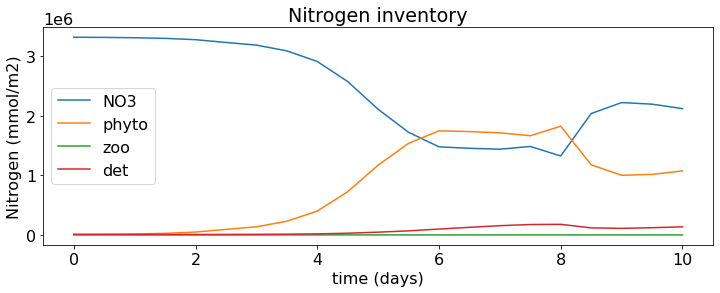

In [123]:
# plot time series of inventories
plt.rcParams.update({'font.size':16})
fig = plt.figure(figsize=[12,4])
plt.plot(time[:]/86400, NO3_inv)
plt.plot(time[:]/86400, phyto_inv)
plt.plot(time[:]/86400, zoo_inv)
plt.plot(time[:]/86400, det_inv)
plt.ylabel('Nitrogen (mmol/m2)')
plt.xlabel('time (days)')
plt.title('Nitrogen inventory')
plt.legend(['NO3', 'phyto', 'zoo', 'det'])

plt.savefig('Figures/nitrogen_inventories.png')